Processing 1000 images in NORMAL...


Processing NORMAL:   0%|          | 0/1000 [00:00<?, ?it/s]

Skipping: C:\Users\niran\OneDrive\Desktop\Machine Learning\processed_data\NORMAL\NORMAL_1014.png (already exists)
Skipping: C:\Users\niran\OneDrive\Desktop\Machine Learning\processed_data\NORMAL\NORMAL_1038.png (already exists)
Skipping: C:\Users\niran\OneDrive\Desktop\Machine Learning\processed_data\NORMAL\NORMAL_1039.png (already exists)
Skipping: C:\Users\niran\OneDrive\Desktop\Machine Learning\processed_data\NORMAL\NORMAL_1040.png (already exists)
Skipping: C:\Users\niran\OneDrive\Desktop\Machine Learning\processed_data\NORMAL\NORMAL_1041.png (already exists)
Skipping: C:\Users\niran\OneDrive\Desktop\Machine Learning\processed_data\NORMAL\NORMAL_1042.png (already exists)
Skipping: C:\Users\niran\OneDrive\Desktop\Machine Learning\processed_data\NORMAL\NORMAL_1043.png (already exists)
Skipping: C:\Users\niran\OneDrive\Desktop\Machine Learning\processed_data\NORMAL\NORMAL_1044.png (already exists)
Skipping: C:\Users\niran\OneDrive\Desktop\Machine Learning\processed_data\NORMAL\NORMAL_

Processing PNEUMONIA:   0%|          | 0/1000 [00:00<?, ?it/s]

Skipping: C:\Users\niran\OneDrive\Desktop\Machine Learning\processed_data\PNEUMONIA\PNEUMONIA_141.png (already exists)
Skipping: C:\Users\niran\OneDrive\Desktop\Machine Learning\processed_data\PNEUMONIA\PNEUMONIA_1410.png (already exists)
Skipping: C:\Users\niran\OneDrive\Desktop\Machine Learning\processed_data\PNEUMONIA\PNEUMONIA_1411.png (already exists)
Skipping: C:\Users\niran\OneDrive\Desktop\Machine Learning\processed_data\PNEUMONIA\PNEUMONIA_1412.png (already exists)
Skipping: C:\Users\niran\OneDrive\Desktop\Machine Learning\processed_data\PNEUMONIA\PNEUMONIA_142.png (already exists)
Skipping: C:\Users\niran\OneDrive\Desktop\Machine Learning\processed_data\PNEUMONIA\PNEUMONIA_143.png (already exists)
Skipping: C:\Users\niran\OneDrive\Desktop\Machine Learning\processed_data\PNEUMONIA\PNEUMONIA_144.png (already exists)
Skipping: C:\Users\niran\OneDrive\Desktop\Machine Learning\processed_data\PNEUMONIA\PNEUMONIA_145.png (already exists)
Skipping: C:\Users\niran\OneDrive\Desktop\Mac

Copying files: 2000 files [00:02, 816.03 files/s]

✅ Dataset split into train (0.7), validation (0.2), and test (0.1) sets.
Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


58889256/58889256 [==============================] - 16s 0us/step
Epoch 1/20
50/50 [==============================] - 256s 5s/step - loss: 0.6921 - accuracy: 0.5562 - val_loss: 0.6123 - val_accuracy: 0.6400
Epoch 2/20
50/50 [==============================] - 284s 6s/step - loss: 0.6116 - accuracy: 0.6794 - val_loss: 0.5468 - val_accuracy: 0.8175
Epoch 3/20
50/50 [==============================] - 340s 7s/step - loss: 0.5627 - accuracy: 0.7412 - val_loss: 0.4889 - val_accuracy: 0.8825
Epoch 4/20
50/50 [==============================] - 347s 7s/step - loss: 0.5223 - accuracy: 0.7731 - val_loss: 0.4553 - val_accuracy: 0.8675
Epoch 5/20
50/50 [==============================] - 362s 7s/step - loss: 0.4732 - accuracy: 0.8213 - val_loss: 0.4370 - val_accuracy: 0.8425
Epoch 6/20
50/50 [==============================] - 351s 7s/step - loss: 0.4412 - accuracy: 0.8406 - val_loss: 0.4069 - val_accuracy: 0.8675
Epoch 7/20
50/50 [==============================] - 343s 7s/step - loss: 0.4155 - accura

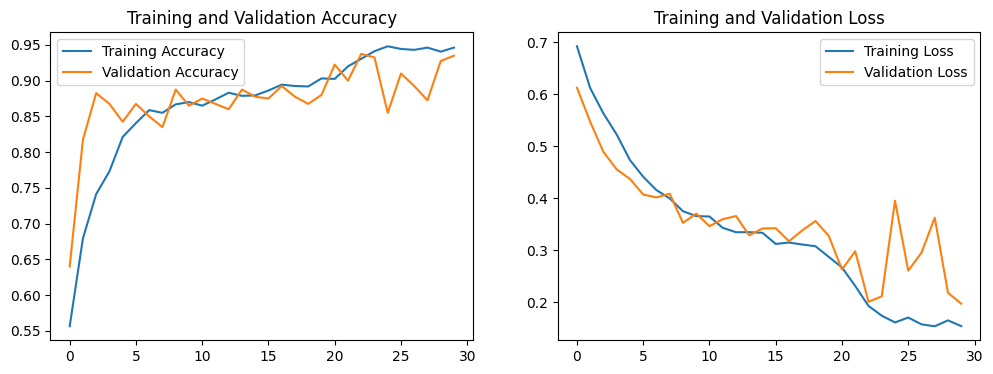

Error predicting C:\Users\niran\OneDrive\Desktop\Machine Learning\PNEUMONIA\person1_bacteria_1.jpeg: [Errno 2] No such file or directory: 'C:\\Users\\niran\\OneDrive\\Desktop\\Machine Learning\\PNEUMONIA\\person1_bacteria_1.jpeg'
7/7 [==============================] - 32s 4s/step - loss: 0.2388 - accuracy: 0.9250
Test Accuracy: 92.50%, Test Loss: 0.2388


In [2]:
# Install required dependencies (run this if not already installed)
!pip install pillow tqdm tensorflow keras matplotlib numpy split-folders

# Import libraries
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import splitfolders

# Step 1: Preprocess images (center-crop and resize to 224x224 for VGG16)
def process_and_crop_images(input_folder, output_folder, target_size=(224, 224)):
    """Processes images by center-cropping to square and resizing."""
    expected_categories = ['NORMAL', 'PNEUMONIA']
    
    if not os.path.exists(input_folder):
        raise FileNotFoundError(f"Input folder not found: {input_folder}")
    
    for category in expected_categories:
        category_path = os.path.join(input_folder, category)
        save_path = os.path.join(output_folder, category)

        if not os.path.exists(category_path):
            print(f"Skipping: {category_path} (does not exist)")
            continue

        os.makedirs(save_path, exist_ok=True)
        image_files = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        print(f"Processing {len(image_files)} images in {category}...")
        for filename in tqdm(image_files, desc=f"Processing {category}"):
            try:
                img_path = os.path.join(category_path, filename)
                save_img_path = os.path.join(save_path, filename)
                
                if os.path.exists(save_img_path):
                    print(f"Skipping: {save_img_path} (already exists)")
                    continue
                
                img = Image.open(img_path).convert('RGB')
                w, h = img.size
                min_dim = min(w, h)
                img = img.crop((
                    (w - min_dim) // 2,
                    (h - min_dim) // 2,
                    (w + min_dim) // 2,
                    (h + min_dim) // 2
                ))
                img = img.resize(target_size)
                img.save(save_img_path)
            except Exception as e:
                print(f"Error processing {img_path}: {e}")
                continue

    print("✅ Image preprocessing complete.")

# Step 2: Split dataset into train, validation, and test sets
def split_dataset(input_folder, output_folder, train_ratio=0.7, val_ratio=0.2, test_ratio=0.1):
    """Splits dataset into train, validation, and test sets."""
    splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(train_ratio, val_ratio, test_ratio))
    print(f"✅ Dataset split into train ({train_ratio}), validation ({val_ratio}), and test ({test_ratio}) sets.")

# Step 3: Create data generators with class weights for imbalance
def create_data_generators(train_dir, val_dir, test_dir, target_size=(224, 224), batch_size=32):
    """Creates data generators for training, validation, and testing."""
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    val_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary',
        shuffle=True
    )
    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary',
        shuffle=False
    )
    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary',
        shuffle=False
    )
    
    # Compute class weights to handle imbalance
    class_weights = {
        0: len(os.listdir(os.path.join(train_dir, 'PNEUMONIA'))) / len(os.listdir(os.path.join(train_dir, 'NORMAL'))),
        1: 1.0
    }
    return train_generator, val_generator, test_generator, class_weights

# Step 4: Build and train VGG16-based model
def build_and_train_model(train_generator, val_generator, class_weights, epochs=20):
    """Builds and trains a VGG16-based model."""
    # Load VGG16 with pre-trained weights, excluding top layers
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
    # Freeze base model layers
    for layer in base_model.layers:
        layer.trainable = False
    
    # Build model
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    # Compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train model
    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=val_generator,
        class_weight=class_weights,
        verbose=1
    )

    # Fine-tune by unfreezing some layers
    for layer in base_model.layers[-4:]:
        layer.trainable = True
    
    # Recompile with lower learning rate
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    # Continue training
    history_fine = model.fit(
        train_generator,
        epochs=10,
        validation_data=val_generator,
        class_weight=class_weights,
        verbose=1
    )
    
    return model, history, history_fine

# Step 5: Predict on a single image
def predict_image(model, image_path, target_size=(224, 224)):
    """Predicts if an image is NORMAL or PNEUMONIA."""
    try:
        img = Image.open(image_path).convert('RGB')
        w, h = img.size
        min_dim = min(w, h)
        img = img.crop((
            (w - min_dim) // 2,
            (h - min_dim) // 2,
            (w + min_dim) // 2,
            (h + min_dim) // 2
        ))
        img = img.resize(target_size)
        img_array = np.array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        
        prediction = model.predict(img_array)[0][0]
        label = 'PNEUMONIA' if prediction > 0.5 else 'NORMAL'
        confidence = prediction if prediction > 0.5 else 1 - prediction
        return label, confidence, img
    except Exception as e:
        print(f"Error predicting {image_path}: {e}")
        return None, None, None

# Step 6: Plot training history
def plot_training_history(history, history_fine=None):
    """Plots training and validation accuracy and loss."""
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    if history_fine:
        acc += history_fine.history['accuracy']
        val_acc += history_fine.history['val_accuracy']
        loss += history_fine.history['loss']
        val_loss += history_fine.history['val_loss']
    
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

# Set paths
input_path = r'C:\Users\niran\OneDrive\Desktop\Machine Learning'
processed_path = r'C:\Users\niran\OneDrive\Desktop\Machine Learning\processed_data'
split_path = r'C:\Users\niran\OneDrive\Desktop\Machine Learning\split_data'

# Step 1: Preprocess images
process_and_crop_images(input_path, processed_path, target_size=(224, 224))

# Step 2: Split dataset
split_dataset(processed_path, split_path)

# Step 3: Create data generators
train_dir = os.path.join(split_path, 'train')
val_dir = os.path.join(split_path, 'val')
test_dir = os.path.join(split_path, 'test')
train_generator, val_generator, test_generator, class_weights = create_data_generators(train_dir, val_dir, test_dir)

# Step 4: Train model
model, history, history_fine = build_and_train_model(train_generator, val_generator, class_weights, epochs=20)

# Step 5: Plot training history
plot_training_history(history, history_fine)

# Step 6: Test prediction on a sample image
sample_image_path = r'C:\Users\niran\OneDrive\Desktop\Machine Learning\PNEUMONIA\person1_bacteria_1.jpeg'  # Replace with actual image path
label, confidence, img = predict_image(model, sample_image_path)
if label:
    print(f"Prediction for {sample_image_path}: {label} (Confidence: {confidence:.2%})")
    plt.imshow(img)
    plt.title(f'Prediction: {label} ({confidence:.2%})')
    plt.axis('off')
    plt.show()

# Step 7: Evaluate model on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2%}, Test Loss: {test_loss:.4f}")